# The Towers of Hanoi

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/07/Tower_of_Hanoi.jpeg/600px-Tower_of_Hanoi.jpeg">

In this game, you move disks one at a time from one tower to another with the property that disks always stay in order. The rules of the game are that you can move disks from one tower to another, but you cannot put a smaller disk on top of a larger disk. There is a story that an ancient temple in India had such a puzzle with 64 disks, and that someone solved it! You can try to figure out whether or not that is possible.

[Try playing it online](https://www.mathsisfun.com/games/towerofhanoi.html)

In [ ]:
class Hanoi:
    def __init__(self, num_disks):
        '''Create a towers of Hanoi instance with num_disks disks.
        Can also call it with a string to initialize the state.'''
        if type(num_disks) == str:
            self._from_str(num_disks)
        else:
            self.num_disks = num_disks
            self._state = [list(range(num_disks)), [], []]
            self._num_moves = 0

    def move(self, from_tower, to_tower):
        a = self._state[from_tower]
        b = self._state[to_tower]
        assert a != [], "Cannot move from an empty tower"
        assert b == [] or b[0] > a[0], "Cannot move a larger disk onto a smaller one"
        b.insert(0, a.pop(0))
        self._num_moves += 1

    def __str__(self):  # so you can print(hanoi)
        n = self.num_disks
        ans = f"After {self._num_moves:,} moves:\n\n"
        height = n + 1
        padded_widths = [([0] * height + [i +1 for i in tower])[-height:] for tower in self._state]
        for i in range(height):
            ans += ' '.join(('x'* (2 * w[i] +1) if w[i] else '|').center(2 * n + 1) for w in padded_widths)
            ans += '\n'
        ans += "-" * (6 * n + 5)
        if self.is_solved():
            ans += ("\n" + "!!! YAY !!!".center(6 * n + 5)) * 3
        return ans

    def is_solved(self):
        return self._state[0] == self._state[1] == []


hanoi = Hanoi(2)
print(hanoi)
hanoi.move(0, 1)
print(hanoi)
hanoi.move(0, 2)
print(hanoi)
hanoi.move(1, 2)
print(hanoi)

After 0 moves:

  |     |     |  
 xxx    |     |  
xxxxx   |     |  
-----------------
After 1 moves:

  |     |     |  
  |     |     |  
xxxxx  xxx    |  
-----------------
After 2 moves:

  |     |     |  
  |     |     |  
  |    xxx  xxxxx
-----------------
After 3 moves:

  |     |     |  
  |     |    xxx 
  |     |   xxxxx
-----------------
   !!! YAY !!!   
   !!! YAY !!!   
   !!! YAY !!!   


In [ ]:
def helper(hanoi, m, a, b):
    '''Move the top m disks, which are stacked on top of tower a, to tower b.'''
    if m == 0:
        return  # easy base case, move no disks
    c = 3 - a - b
    helper(hanoi, m - 1, a, c)
    hanoi.move(a, b)
    helper(hanoi, m - 1, c, b)
  

def solve(hanoi):
    n = hanoi.num_disks
    helper(hanoi, n, 0, 2)

hanoi = Hanoi(9)
solve(hanoi)
print(hanoi)


After 511 moves:

         |                   |                   |         
         |                   |                  xxx        
         |                   |                 xxxxx       
         |                   |                xxxxxxx      
         |                   |               xxxxxxxxx     
         |                   |              xxxxxxxxxxx    
         |                   |             xxxxxxxxxxxxx   
         |                   |            xxxxxxxxxxxxxxx  
         |                   |           xxxxxxxxxxxxxxxxx 
         |                   |          xxxxxxxxxxxxxxxxxxx
-----------------------------------------------------------
                        !!! YAY !!!                        
                        !!! YAY !!!                        
                        !!! YAY !!!                        


## Solution length
**Theorem**: Our solution has the fewest steps: with $n$ disks, it takes is $2^n - 1$ moves.

**Proof**: 
Proof by induction. Base case $n=1$ is easy, 1 move. ✅

Suppose it takes $2^n-1$ moves to solve Towers of Hanoi with $n$ disks. Consider the problem with $n+1$ disks. The biggest disk must move one or more times. Each time the biggest disk is moved, all the other $n$ disks must be on the remaining rod (not the one it is currently on or going to). So the $n$ disks must be shifted around between each of the biggest disk moves (unless it is moved back and forth, which is wasteful). By induction hypothesis, the optimal way to shift those $n$ disks is  $2^n -1$ moves, because: (a) it doesn't matter that there is now an $n+1$st disk and (b) we have only argued it for moving from the first to last rod, but by symmetry it holds for any pair of rods. Thus the total cost will at least $$(2^n-1) + 1 + (2^n-1)=2*2^n -1 = 2^{n+1}-1$$
because it takes $2^n-1$ moves to shift the $n$ disks off the first rod, plus at least 1 move for the big disk, plus at least $2^n-1$ to shift the $n$ disks back on top of the big disk after it is put back on the last rod. Our algorithm achieves this cost exactly, and is thus optimal and makes $2^{n+1}-1$ moves. ◼




# Shortest path

Given a unweighted graph, we will compute the shortest path from a given source node $s$ to a given target node $t$.

We will first compute shortest path between two nodes on an undirected unweighted graph using **Breadth First Seach** (BFS) 

For simplicity here, we will represent a graph by dictionary where the nodes are strings `graph[u]` is the list of vertices adjacent to $u$. 

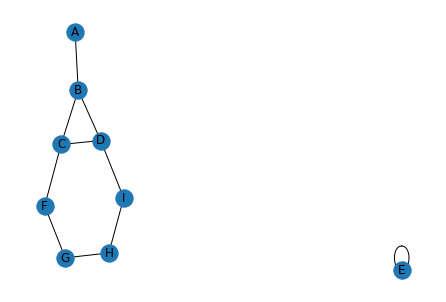

In [ ]:
# example graph
graph = {'A': ['B'], 
        'B': ['A', 'C', 'D'], 
        'C': ['B', 'D', 'F'],
        'D': ['C', 'B', 'I'],
        'E': ['E'],
        'F': ['C', 'G'],
        'G': ['F', 'H'],
        'H': ['G', 'I'],
        'I': ['H', 'D']
        }

import networkx as nx
nx_graph = nx.Graph()
for u in graph:
    for v in graph[u]:
       nx_graph.add_edge(u, v)
# Draw
nx.draw(nx_graph, with_labels=True)

In [ ]:
def bfs(graph, s, t):  
    '''find shortest path from s to t in graph using breadth-first search
    returns None if there is no path'''

    # these first two checks are not important for the algorithm, just for printing
    if s not in graph:
        print(s, "not in graph (or at least has no outgoing edges)")
        return
    if all(t not in graph[u] for u in graph):  
        print(t, "not in graph (or at least has no incoming edges)")
        return

    distances = {s: 0}
    preds = {}  # maps each node to its parent on path from s to t
    frontier = [s]  
    distance = 0
    while frontier != {}:
        next_frontier = []
        for node in frontier:
            if node == t:
              return compute_path(preds, s, t) 
            for neighbor in graph[node]:
              if neighbor not in distances:
                distances[neighbor] = distance
                preds[neighbor] = node
                next_frontier.append(neighbor)
        frontier = next_frontier
        distance += 1
    print(f"No path found, explored {len(preds):,} nodes")
    return None
  
def compute_path(preds, s, t):
    '''compute the path from s to t using predecessors dictionary'''
    path = [t]  # build up path backwards
    while path[-1] != s:
        path.append(preds[path[-1]])
    path.reverse()
    return path

In [ ]:
bfs(graph, 'A', 'H')

['A', 'B', 'D', 'I', 'H']

In [ ]:
# load word_graph

import gzip
import json
import os

if not os.path.exists("word_neighbors.json.gz"): 
  print("Downloading word_graph")
  import urllib.request  
  urllib.request.urlretrieve("https://drive.google.com/u/0/uc?id=1CA0au6RSZQMB8z4rHBBYrOtqtKot0KIJ&export=download", 
                             "word_neighbors.json.gz")

with gzip.open("word_neighbors.json.gz", 'r') as f:  
    json_bytes = f.read()

json_str = json_bytes.decode('utf-8')
word_graph = json.loads(json_str)
total_neighbors = sum(len(neighbors) for neighbors in word_graph.values())
print(f"Loaded {len(word_graph):,} words and {total_neighbors:,} neighbors (avg. {total_neighbors/len(word_graph):.2f} per word)")

Loaded 47,717 words and 1,598,636 neighbors (avg. 33.50 per word)


In [ ]:
bfs(word_graph, 'Jamaica', 'algorithms')

['Jamaica',
 'Digicel',
 'Vodafone',
 'Nokia',
 'Microsoft',
 'software',
 'coding',
 'algorithms']

In [ ]:
bfs(word_graph, 'Jewish', 'Jamaican')

['Jewish', 'Israeli', 'Ethiopian', 'Kenyan', 'Jamaican']

In [ ]:
bfs(word_graph, 'Jamaican', 'billionaire')

['Jamaican',
 'Haitian',
 'Cuban',
 'Belarusian',
 'Putin',
 'oligarchs',
 'billionaires',
 'billionaire']

# Moving between arbitrary positions in towers of Hanoi

We can combine today's two topics to find the shortest sequence of moves between any two Towers of Hanoi positions. Since our shortest path code expects strings for the nodes, we will now switch to a string representation for a Towers of Hanoi position. (This can also be done with classes but it's more complicated.)

In [ ]:
def list_hanoi_states(n):
        """List all the states of the towers of Hanoi"""
        if n == 0:
            return [[]]
        return [[i] + state for i in range(3) for state in list_hanoi_states(n-1)]
list_hanoi_states(3)

def stringify(state):
    """Return a string representation of a state"""
    n = len(state)
    return ' '.join([''.join([str(i) for i in range(n) if state[i]==a]).rjust(1, "-") for a in range(3)])
stringify([0, 0, 0])

list_hanoi_states(3)

[[0, 0, 0],
 [0, 0, 1],
 [0, 0, 2],
 [0, 1, 0],
 [0, 1, 1],
 [0, 1, 2],
 [0, 2, 0],
 [0, 2, 1],
 [0, 2, 2],
 [1, 0, 0],
 [1, 0, 1],
 [1, 0, 2],
 [1, 1, 0],
 [1, 1, 1],
 [1, 1, 2],
 [1, 2, 0],
 [1, 2, 1],
 [1, 2, 2],
 [2, 0, 0],
 [2, 0, 1],
 [2, 0, 2],
 [2, 1, 0],
 [2, 1, 1],
 [2, 1, 2],
 [2, 2, 0],
 [2, 2, 1],
 [2, 2, 2]]

In [ ]:
# Run this cell, the details are not important, just the output

def make_hanoi_graph(n):
    """Make a graph of all the states of the towers of Hanoi"""

    def list_hanoi_states(n):
        """List all the states of the towers of Hanoi"""
        if n == 0:
            return [[]]
        return [[i] + state for i in range(3) for state in list_hanoi_states(n-1)]

    def legal_move(state, a, b):
        '''Is it legal to move the top disk from tower a to tower b?'''
        return (state + [a]).index(a) < (state + [b]).index(b)

    def move(state, a, b):
        i = state.index(a)
        return state[:i] + [b] + state[i + 1:]

    def stringify(state):
        """Return a string representation of a state"""
        n = len(state)
        return ' '.join([''.join([str(i) for i in range(n) if state[i]==a]).rjust(1, "-") for a in range(3)])

    edges = {}
    for s in list_hanoi_states(n):
        neighbors = []
        for a in range(3):
            for b in range(3):
                if legal_move(s, a, b):
                    neighbors.append(stringify(move(s, a, b)))
        edges[stringify(s)] = neighbors
    return edges

print("Just as an example, the Hanoi graph on 3 disks:")
make_hanoi_graph(3)

Just as an example, the Hanoi graph on 3 disks:


{'- - 012': ['0 - 12', '- 0 12'],
 '- 0 12': ['0 - 12', '- - 012', '1 0 2'],
 '- 01 2': ['0 1 2', '- 1 02', '2 01 -'],
 '- 012 -': ['0 12 -', '- 12 0'],
 '- 02 1': ['0 2 1', '- 2 01', '1 02 -'],
 '- 1 02': ['1 - 02', '0 1 2', '- 01 2'],
 '- 12 0': ['1 2 0', '0 12 -', '- 012 -'],
 '- 2 01': ['2 - 01', '0 2 1', '- 02 1'],
 '0 - 12': ['- 0 12', '- - 012', '0 1 2'],
 '0 1 2': ['- 01 2', '- 1 02', '0 - 12'],
 '0 12 -': ['- 012 -', '- 12 0', '0 2 1'],
 '0 2 1': ['- 02 1', '- 2 01', '0 12 -'],
 '01 - 2': ['1 0 2', '1 - 02', '01 2 -'],
 '01 2 -': ['1 02 -', '1 2 0', '01 - 2'],
 '012 - -': ['12 0 -', '12 - 0'],
 '02 - 1': ['2 0 1', '2 - 01', '02 1 -'],
 '02 1 -': ['2 01 -', '2 1 0', '02 - 1'],
 '1 - 02': ['- 1 02', '01 - 2', '1 0 2'],
 '1 0 2': ['- 0 12', '01 - 2', '1 - 02'],
 '1 02 -': ['- 02 1', '01 2 -', '1 2 0'],
 '1 2 0': ['- 12 0', '01 2 -', '1 02 -'],
 '12 - 0': ['2 1 0', '012 - -', '12 0 -'],
 '12 0 -': ['2 0 1', '012 - -', '12 - 0'],
 '2 - 01': ['- 2 01', '02 - 1', '2 0 1'],
 '2 0 1': 

In [ ]:
hanoi_graph = make_hanoi_graph(8)

In [ ]:
len(bfs(hanoi_graph, '01234567 - -', '- - 01234567'))

256

In [ ]:
# # a little slow
# diameter = 0
# longest = None
# for g1 in hanoi_graph:
#   for g2 in hanoi_graph:
#     if g1 < g2:
#       dist = len(bfs(hanoi_graph, g1, g2)) - 1
#       if dist > diameter:
#         print("Found a new furthest pair:", g1, "is", dist, "moves from", g2, ) 
#         diameter = dist